# Tutorial

This tutorial shows how to load the pretrained InceptionV3 net, trained on the [RSNA Pneumonia Detection Challenge](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview).

The pretrained net and example images are hosted [here](https://drive.google.com/drive/folders/1m9PQpy_8VhGRmygXnS1DcPYexCkEu-AB?usp=sharing), make sure to add the folder to your Google Drive to access it. Otherwise, you can copy the content to a new destination of your choice.

## Load dependencies

This section load the code dependencies and mounts Google Drive into the kernel.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Load the model

Remember to run `model.eval()` to deactivate the droupout layers, and get the same results at every model evaluation on the same input.

In [2]:
model = models.inception_v3(pretrained=True)
model.aux_logits = False
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

device = torch.device('cpu')
# DEACTIVATE DROPOUT LAYERS
model.to(device)

net_path = '/content/drive/My Drive/Assessing-Saliency-Maps/PNA_InceptionV3.pth'
model.load_state_dict(torch.load(net_path, map_location=device))
model.eval()
print('Model loaded to %s' % device)

Model loaded to cpu


## Run the model

This section shows how to run the model on 2 example images from the test dataset: one labeled as healthy (label `0`), the other labeled as sick (label `1`).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Label: 1\nPrediction: 1')

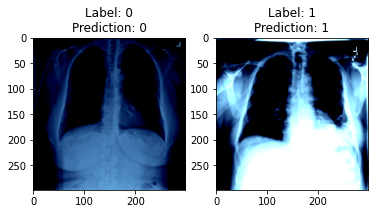

In [3]:
# DEFINE PREPROCESSING TRANSFORMS
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.299, 0.224, 0.225])
])
normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.299, 0.224, 0.225])

# DEFINE UTIL FUNCTION
def imshow(ax, pic):
    npimg = np.array(pic)
    ax.imshow(np.transpose(npimg, (1, 2, 0)))

fig = plt.figure()
ax1, ax2 = fig.subplots(1, 2)

# THE PNG IMAGE HAS SHAPE (1, 299, 299) BUT THE MODEL ESPECTS A (n, 3, 299, 299) INPUT
pic = Image.open('/content/drive/My Drive/Assessing-Saliency-Maps/example_healthy.png').convert('RGB')
img = preprocess(pic)
input = normalize(img)
input = input.unsqueeze(0)
output = model(input)
_, prediction = torch.max(output, 1)
imshow(ax1, img)
ax1.set_title('Label: 0\nPrediction: %d' % prediction)

# THE PNG IMAGE HAS SHAPE (1, 299, 299) BUT THE MODEL ESPECTS A (n, 3, 299, 299) INPUT
pic = Image.open('/content/drive/My Drive/Assessing-Saliency-Maps/example_sick.png').convert('RGB')
img = preprocess(pic)
input = normalize(img)
input = input.unsqueeze(0)
output = model(input)
_, prediction = torch.max(output, 1)
imshow(ax2, img)
ax2.set_title('Label: 1\nPrediction: %d' % prediction)

## Contacts

Feel free to reach out to [jtenegg1@jh.edu](mailto:jtenegg1@jhu.edu) for any question or issue related to this tutorial.

## References

This tutorial is based on [QTIM-Lab original work](https://github.com/QTIM-Lab/Assessing-Saliency-Maps).